In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Fig1

In [110]:
f = './log/index_message_2016-6-8_XXX.log.csv'
# f = './log/index_message_2016-6-11_BUF1_G5.log.csv'
# f = './log/index_message_2016-6-12_G5_BUF1_FR20.log.csv'
# f = './log/index_message_2016-6-13_G5_BUF1_FR20.log.csv'

df = pd.read_csv(f, delimiter=';', index_col=0)
df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
df.set_index('start_ts', inplace=True)
df['total_reward'] = df['tr_reward'] - df['op_cost']

In [5]:
delta = pd.Timedelta('2 seconds')

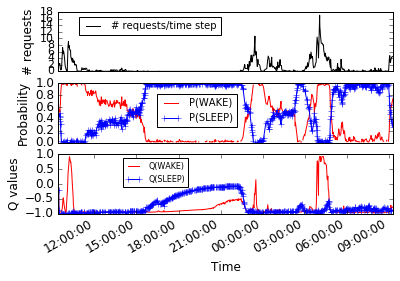

In [127]:
plt.figure(1)
ax = plt.subplot(311)
start = pd.to_datetime("2014-09-25 9:20:00"); end = pd.to_datetime("2014-09-26 9:20:00")
# start = pd.to_datetime("2014-11-05 9:20:00"); end = pd.to_datetime("2014-11-05 10:20:00")
# start = pd.to_datetime("2014-10-15 9:50:00"); end = pd.to_datetime("2014-10-16 9:50:00") # message_2016-6-13_G5_BUF1_FR20.log
ts = df[['req_generated']][start:end].resample('1Min')
ts = ts.sample(frac=0.5)
ts.columns = pd.Index(['# requests/time step'])
ts.plot(legend=True, ax=ax, 
        style=['k-'], fontsize=11
       )
ax.get_xaxis().set_visible(False)
plt.legend(fontsize=10, bbox_to_anchor=(0.5,1), )
ax.yaxis.set_label_text('# requests')
ax.yaxis.label.set_fontsize(12)
# ------------------------------
ax = plt.subplot(312)
ts = df[['batch_dist_wake', 'batch_dist_sleep']][start:end].resample('1Min')
ts = ts.sample(frac=0.5)
ts.columns = pd.Index(['P(WAKE)', 'P(SLEEP)'])
ts.plot(legend=True, ax=ax, 
        style=['r-','b-+'], fontsize=12
       )
ax.yaxis.set_label_text('Probability')
ax.yaxis.label.set_fontsize(12)
plt.legend(fontsize=8)
ax.get_xaxis().set_visible(False)
plt.legend(bbox_to_anchor=(0.55,0.9), fontsize=10)
# ------------------------------
ax = plt.subplot(313)
ts = df[['q_wake', 'q_sleep']][start:end].resample('1Min')
ts.columns = pd.Index(['Q(WAKE)', 'Q(SLEEP)'])
ts.index.name = 'Time'
ts = ts.sample(frac=0.5)
ts.plot(legend=True, ax=ax, 
        style=['r-','b-+'], fontsize=12 
       )
ax.xaxis.label.set_fontsize(12)
ax.yaxis.set_label_text('Q values')
ax.yaxis.label.set_fontsize(12)
plt.legend(fontsize=8, bbox_to_anchor=(0.4,1),)
# ------------------------------
plt.savefig("single_buffer.png", bbox_inches='tight', dpi=300)

---

In [84]:
f1 = './log/index_message_2016-6-11_1230_FR1000_G5.log.csv'
df1 = pd.read_csv(f1, delimiter=';', index_col=0)
df1.loc[:, 'start_ts'] = df1['start_ts'].apply(lambda x: pd.to_datetime(x))
df1.set_index('start_ts', inplace=True)
df1['total_reward'] = df1['tr_reward'] - df1['op_cost']

In [85]:
f2 = './log/index_message_2016-6-11_1230_FR20_G5.log.csv'
df2 = pd.read_csv(f2, delimiter=';', index_col=0)
df2.loc[:, 'start_ts'] = df2['start_ts'].apply(lambda x: pd.to_datetime(x))
df2.set_index('start_ts', inplace=True)
df2['total_reward'] = df2['tr_reward'] - df2['op_cost']

In [86]:
f3 = './log/index_message_2016-6-11_1230_FR1_G5.log.csv'
df3 = pd.read_csv(f3, delimiter=';', index_col=0)
df3.loc[:, 'start_ts'] = df3['start_ts'].apply(lambda x: pd.to_datetime(x))
df3.set_index('start_ts', inplace=True)
df3['total_reward'] = df3['tr_reward'] - df3['op_cost']

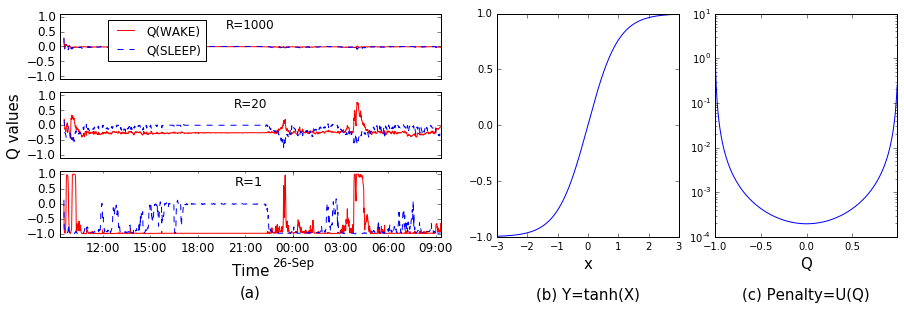

In [131]:
plt.figure(1)
# -------------
ax = plt.subplot(321)
start = pd.to_datetime("2014-09-25 9:20:00")
end = pd.to_datetime("2014-09-26 9:20:00")
ts1 = df1[['q_wake', 'q_sleep']][start:end].resample('1Min')
ts1.columns = pd.Index(['Q(WAKE)', 'Q(SLEEP)'])
ts1.plot(figsize=(15, 4), legend=True, ax=ax, 
        style=['r-','b--'], fontsize=12, title='R=1000',
        ylim=(-1.1,1.1)
       )
ax.get_xaxis().set_visible(False)
plt.legend(bbox_to_anchor=(0.4,1), fontsize=12)
ax.title.set_position((0.5, 0.7))
# ax.yaxis.set_label_text('Q values')
# ax.yaxis.label.set_fontsize(15)
# -------------
ax = plt.subplot(323)
start = pd.to_datetime("2014-09-25 9:20:00")
end = pd.to_datetime("2014-09-26 9:20:00")
ts2 = df2[['q_wake', 'q_sleep']][start:end].resample('1Min')
ts2.columns = pd.Index(['Q(WAKE)', 'Q(SLEEP)'])
ts2.plot(figsize=(15, 4), legend=False, ax=ax, 
        style=['r-','b--'], fontsize=12, title='R=20',
        ylim=(-1.1,1.1)
       )
ax.get_xaxis().set_visible(False)
ax.title.set_position((0.5, 0.7))
ax.yaxis.set_label_text('Q values')
ax.yaxis.label.set_fontsize(15)
# -------------
ax = plt.subplot(325)
start = pd.to_datetime("2014-09-25 9:20:00")
end = pd.to_datetime("2014-09-26 9:20:00")
ts3 = df3[['q_wake', 'q_sleep']][start:end].resample('1Min')
ts3.columns = pd.Index(['Q(WAKE)', 'Q(SLEEP)'])
ts3.index.name = 'Time'
ts3.plot(figsize=(15, 4), legend=False, ax=ax,         
        style=['r-','b--'], fontsize=12, title='R=1',
        ylim=(-1.1,1.1) 
       )

ax.xaxis.label.set_fontsize(15);ax.xaxis.label.set_position((0.5, 0.2)); ax.xaxis.set_label_coords(0.5, -0.4)
ax.set_title('(a)'); ax.title.set_fontsize(15); ax.title.set_position((0.5, -1))
ax.annotate('R=1', size=13, xy=(0.26,0.4), xycoords='figure fraction')
# ax.yaxis.set_label_text('Q values')
# ax.yaxis.label.set_fontsize(15)
# -------------
ax = plt.subplot(143)
x = np.arange(-3, 3, 0.01)
y = np.tanh(x)
plt.plot(x, y)
ax.xaxis.set_label_text('x')
ax.xaxis.label.set_fontsize(15)
# ax.yaxis.set_label_text('y')
# ax.yaxis.label.set_fontsize(15)
# ax.yaxis.label.set_position((0,0.5))
ax.set_title('(b) Y=tanh(X)'); ax.title.set_fontsize(15); ax.title.set_position((0.5, -0.3))
ax.xaxis.label.set_fontsize(15)
# -------------
ax = plt.subplot(144)
x = np.arange(-1, 1, 0.01)
y = 1e-4*(1.0/(x-1-1e-2)**2+1.0/(x+1+1e-2)**2)
ts4 = pd.Series(y);ts4.index=pd.Index(x)
ts4.plot(logy=True)
ax.xaxis.set_label_text('Q')
ax.xaxis.label.set_fontsize(15)
# ax.yaxis.set_label_text('U')
# ax.yaxis.label.set_fontsize(15)
ax.set_title('(c) Penalty=U(Q)'); ax.title.set_fontsize(15); ax.title.set_position((0.5, -0.3))
ax.xaxis.label.set_fontsize(15)
plt.savefig("fixed_rs.png", bbox_inches='tight', dpi=400)

# Fig5

In [7]:
f = './log/index_message_2016-6-12_G5_BUF2_AR1_b5.log.csv'
df = pd.read_csv(f, delimiter=';', index_col=0)
df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
df.set_index('start_ts', inplace=True)
df['total_reward'] = 0.5*df['tr_reward'] - 0.5*df['op_cost']
df['a_wake'] = (df.agent_action=='(False, \'serve_all\')')
df['a_sleep'] = (df.agent_action=='(True, None)')

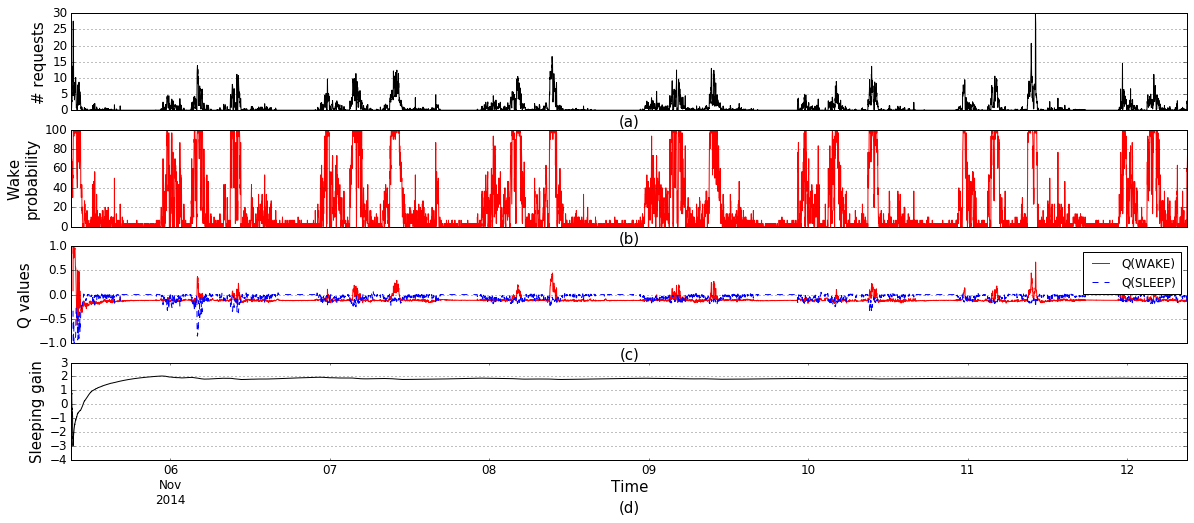

In [8]:
plt.figure(1)
#------------------
ax = plt.subplot(411)
ts = df[['req_generated']].resample('1Min')
ts.columns = pd.Index(['# request\narrivals'])
ts.plot(figsize=(20, 8), ax=ax, legend=False,
        style=['k-'], fontsize=12, title='(a)',
       )
ax.title.set_position((0.5, -0.22)) 
ax.get_xaxis().set_visible(False)
ax.yaxis.set_label_text('# requests')
ax.yaxis.label.set_fontsize(15)
ax.title.set_fontsize(15)
ax.grid()
#------------------
ax = plt.subplot(412)
ts = df[['a_wake']].resample('1Min')*100
ts.columns = pd.Index(['waking percentage'])
ts.plot(figsize=(20, 8), ax=ax, legend=False,
        style=['r-'], fontsize=12, title='(b)',
       )
ax.title.set_position((0.5, -0.22)) 
ax.get_xaxis().set_visible(False)
ax.yaxis.set_label_text('Wake\nprobability')
ax.yaxis.label.set_fontsize(15)
ax.title.set_fontsize(15)
ax.grid()
#------------------
ax = plt.subplot(413)
ts = df[['q_wake', 'q_sleep']].resample('1Min')
ts.columns =pd.Index(['Q(WAKE)', 'Q(SLEEP)'])
ts.plot(figsize=(20, 8), legend=True, ax=ax, 
        style=['r-','b--'], fontsize=12, title='(c)',)
ax.title.set_position((0.5, -0.22)) 
ax.get_xaxis().set_visible(False)
ax.yaxis.set_label_text('Q values')
ax.yaxis.label.set_fontsize(15)
ax.title.set_fontsize(15)
ax.grid()
#------------------
ax = plt.subplot(414)
step = (df.index-df.index[0])/delta+1
ts = df['total_reward'].cumsum()/step
ts_on = (0.5*df['req_generated']-0.5*5).cumsum()/step
(ts-ts_on).plot(figsize=(20, 8), legend=False, ax=ax, 
        style=['k-'], 
#                 ylim=(0, 4), 
                fontsize=12, title='(d)'
       )
ax.title.set_position((0.5, -0.6)) 
ax.yaxis.set_label_text('Sleeping gain')
ax.yaxis.label.set_fontsize(15)
ax.xaxis.label.set_fontsize(15); ax.xaxis.label.set_text('Time'); ax.xaxis.set_label_coords(0.5, -0.2)
ax.title.set_fontsize(15)
ax.grid()
plt.savefig("ts.png", bbox_inches='tight', dpi=400)


# Fig 6

In [43]:
f = './log/index_message_2016-6-8_2130_AR1.log.csv'
df = pd.read_csv(f, delimiter=';', index_col=0)
df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
df.set_index('start_ts', inplace=True)
df['total_reward'] = df['tr_reward'] - df['op_cost']
df['a_wake'] = (df.agent_action=='(False, \'serve_all\')')
df['a_sleep'] = (df.agent_action=='(True, None)')

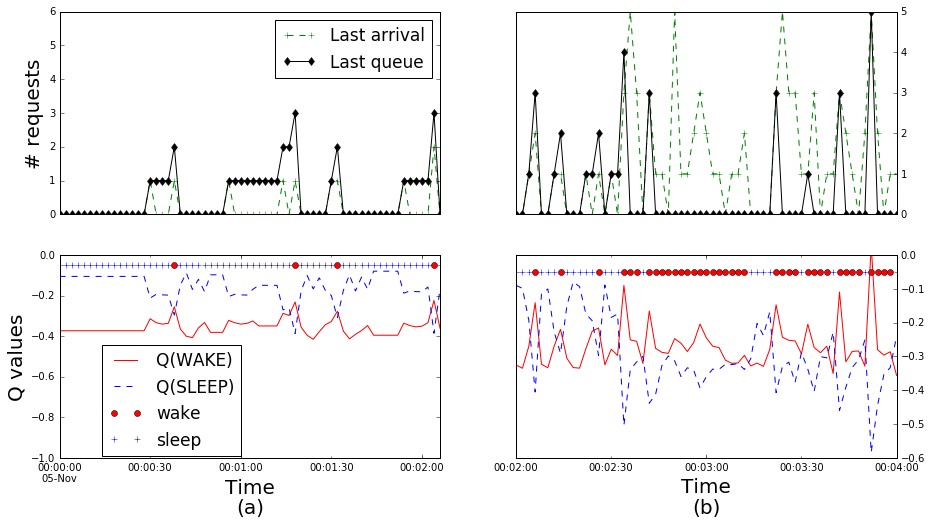

In [57]:
plt.figure(1)
#-------------------
start = pd.to_datetime("2014-11-05 00:00:00")
end = pd.to_datetime("2014-11-05 00:02:06")
ax = plt.subplot(221)
ts = df.ob_last_t[start:end]
ts.name = 'Last arrival'
ts.plot(legend=True, ax=ax, 
        figsize=(15, 8),style=['g--+'])
ax.get_xaxis().set_visible(False)
ax.yaxis.set_label_text('# requests')
ax.yaxis.label.set_fontsize(20)

#-------------------
ax = plt.subplot(221)
ts = df.ob_new_q[start:end]
ts.name = 'Last queue'
ts.plot(legend=True, ax=ax, 
        figsize=(15, 8),style=['k-d'], ylim=(0,6))
ax.get_xaxis().set_visible(False)
ax.yaxis.set_label_text('# requests')
ax.yaxis.label.set_fontsize(20)
plt.legend(bbox_to_anchor=(0.3,1), fontsize=12)
plt.legend(fontsize=17)
#-------------------
ax = plt.subplot(223)
ts = df.loc[start:end][['q_wake', 'q_sleep']]
ts.columns = pd.Index(['Q(WAKE)','Q(SLEEP)'])
ts.plot(legend=True, ax=ax, 
        figsize=(10, 8),style=['r-','b--'])
ax.yaxis.set_label_text('Q values')
ax.yaxis.label.set_fontsize(20)
#-------------------
ax = plt.subplot(223)
ts = df[['a_wake','a_sleep']].loc[start:end]*3-3.05
ts.columns = pd.Index(['wake', 'sleep'])
ts.plot(legend=True, ax=ax, 
        figsize=(15, 8),style=['ro','b+'], ylim=(-1, 0))
ax.xaxis.label.set_text('Time');ax.xaxis.label.set_fontsize(20); ax.xaxis.set_label_coords(0.5, -0.1)
ax.title.set_text('(a)'); ax.title.set_fontsize(20); ax.title.set_position((0.5, -0.3))
plt.legend(fontsize=17, bbox_to_anchor=(0.5, 0.6))
#-------------------
start = pd.to_datetime("2014-11-07 00:02:00")
end = pd.to_datetime("2014-11-07 00:04:00")
ax = plt.subplot(222)
ts = df.ob_last_t[start:end]
ts.columns = pd.Index(['# request in last step'])
ts.plot(legend=False, ax=ax, 
        figsize=(15, 8),style=['g--+'])
ax.get_xaxis().set_visible(False)
ax.yaxis.set_ticks_position('right')
#-------------------
ax = plt.subplot(222)
ts = df.ob_new_q[start:end]
ts.columns = pd.Index(['# request in last step'])
ts.plot(legend=False, ax=ax, 
        figsize=(15, 8),style=['k-d'])
ax.get_xaxis().set_visible(False)
ax.yaxis.set_ticks_position('right')

#-------------------
ax = plt.subplot(224)
ts = df.loc[start:end][['q_wake', 'q_sleep']]
ts.columns = pd.Index(['Q(WAKE)','Q(SLEEP)'])
ts.plot(legend=False, ax=ax, 
        figsize=(15, 8),style=['r-','b--'])
ax.yaxis.set_ticks_position('right')
#-------------------
ax = plt.subplot(224)
ts = df[['a_wake','a_sleep']].loc[start:end]*3-3.05
ts.columns = pd.Index(['wake', 'sleep'])
ts.plot(legend=False, ax=ax, 
        figsize=(15, 8),style=['ro','b+'], ylim=(-0.6, 0))

ax.xaxis.label.set_text('Time');ax.xaxis.label.set_fontsize(20);
ax.title.set_text('(b)'); ax.title.set_fontsize(20); ax.title.set_position((0.5, -0.3))

plt.savefig("policy.png", bbox_inches='tight', dpi=300)

# Fig 7

In [206]:
f = './log/index_message_2016-6-8_2130_AR1.log.csv'
df = pd.read_csv(f, delimiter=';', index_col=0)
df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
df.set_index('start_ts', inplace=True)
df['total_reward'] = df['tr_reward'] - df['op_cost']
df['a_wake'] = (df.agent_action=='(False, \'serve_all\')')
df['a_sleep'] = (df.agent_action=='(True, None)')

In [207]:
f2 = './log/index_message_2016-6-9_1140_N1.log.csv'
df2 = pd.read_csv(f2, delimiter=';', index_col=0)
df2.loc[:, 'start_ts'] = df2['start_ts'].apply(lambda x: pd.to_datetime(x))
df2.set_index('start_ts', inplace=True)
df2['total_reward'] = df2['tr_reward'] - df2['op_cost']

In [208]:
f3 = './log/index_message_2016-6-9_1140_N2.log.csv'
df3 = pd.read_csv(f3, delimiter=';', index_col=0)
df3.loc[:, 'start_ts'] = df3['start_ts'].apply(lambda x: pd.to_datetime(x))
df3.set_index('start_ts', inplace=True)
df3['total_reward'] = df3['tr_reward'] - df3['op_cost']

In [209]:
f4 = './log/index_message_2016-6-5_1102_PoissonQNN.log.csv'
df4 = pd.read_csv(f4, delimiter=';', index_col=0)
df4.loc[:, 'start_ts'] = df4['start_ts'].apply(lambda x: pd.to_datetime(x))
df4.set_index('start_ts', inplace=True)
df4['total_reward'] = df4['tr_reward'] - df4['op_cost']

In [210]:
f5 = './log/index_message_2016-6-5_0000_P.log.csv'
df5 = pd.read_csv(f5, delimiter=';', index_col=0)
df5.loc[:, 'start_ts'] = df5['start_ts'].apply(lambda x: pd.to_datetime(x))
df5.set_index('start_ts', inplace=True)
df5['total_reward'] = df5['tr_reward'] - df5['op_cost']

In [211]:
f6 = './log/index_message_2016-6-5_0010_P.log.csv'
df6 = pd.read_csv(f6, delimiter=';', index_col=0)
df6.loc[:, 'start_ts'] = df6['start_ts'].apply(lambda x: pd.to_datetime(x))
df6.set_index('start_ts', inplace=True)
df6['total_reward'] = df6['tr_reward'] - df6['op_cost']

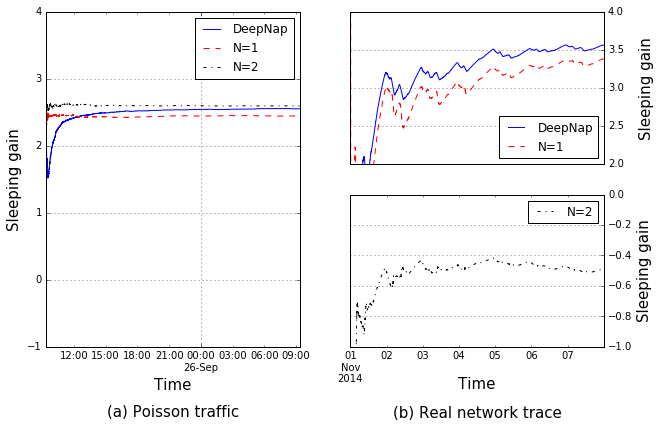

In [228]:
plt.figure(1)
#-------------------------
ax = plt.subplot(222)
step = (df.index-df.index[0])/delta+1
ts = df['total_reward'].cumsum()/step
ts_on = (df['req_generated']-5).cumsum()/step
ts = ts-ts_on
ts.name = 'DeepNap'
ts.plot(figsize=(8, 4), legend=True, ax=ax, 
        style=['b-'],
       )
step = (df2.index-df2.index[0])/delta+1
ts = df2['total_reward'].cumsum()/step
ts_on = (df2['req_generated']-5).cumsum()/step
ts = ts-ts_on
ts.name = 'N=1'
ts.plot(figsize=(10, 4), legend=True, ax=ax, 
        style=['r--'], ylim=(2,4)        
       )
ax.get_xaxis().set_visible(False)
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(15);ax.yaxis.set_label_position('right');ax.yaxis.set_ticks_position('right');
ax.yaxis.set_label_coords(1.14, 0.5);
ax.grid()
#-------------------------
ax = plt.subplot(224)
step = (df3.index-df3.index[0])/delta+1
ts = df3['total_reward'].cumsum()/step
ts_on = (df3['req_generated']-5).cumsum()/step
ts.name = 'N=2'
ts.plot(figsize=(10, 6), legend=True, ax=ax, 
        style=['k-.'], ylim=(-1,0)  
       )
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(15);ax.yaxis.set_label_position('right');ax.yaxis.set_ticks_position('right');
ax.xaxis.label.set_fontsize(15); ax.xaxis.label.set_text('Time'); ax.xaxis.set_label_coords(0.5, -0.2)
ax.title.set_text('(b) Real network trace'); ax.title.set_fontsize(15); ax.title.set_position((0.5, -0.5))
ax.grid()
# -----------------------
start = pd.to_datetime("2014-09-25 09:20:29")
end = pd.to_datetime("2014-09-26 09:20:29")
ax = plt.subplot(121)
df4 = df4.loc[start:end]
step = (df4.index-df4.index[0])/delta+1
ts = df4['total_reward'].cumsum()/step
ts_on = (df4['req_generated']-5).cumsum()/step
ts = ts-ts_on
ts.name = 'DeepNap'
ts.plot(figsize=(8, 4), legend=True, ax=ax, 
        style=['b-'],       
       )
step = (df5.index-df5.index[0])/delta+1
ts = df5['total_reward'].cumsum()/step
ts_on = (df5['req_generated']-5).cumsum()/step
ts = ts-ts_on
ts.name = 'N=1'
ts.plot(figsize=(10, 4), legend=True, ax=ax, 
        style=['r--'],        
       )
step = (df6.index-df6.index[0])/delta+1
ts = df6['total_reward'].cumsum()/step
ts_on = (df6['req_generated']-5).cumsum()/step
ts = ts-ts_on
ts.name = 'N=2'
ts.plot(figsize=(10, 6), legend=True, ax=ax, 
        style=['k-.'], ylim=(-1,4)          
       )
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(15);
ax.title.set_text('(a) Poisson traffic'); ax.title.set_fontsize(15); ax.title.set_position((0.5, -0.225)) 
ax.xaxis.label.set_text('Time'); ax.xaxis.label.set_fontsize(15); 
ax.grid()
plt.savefig("poisson.png", bbox_inches='tight', dpi=300)

# Fig7-v2

In [17]:
def extract_df(f):
    df = pd.read_csv('./log/index_'+f+'.csv', delimiter=';', index_col=0)
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = 0.5*df['tr_reward'] - 0.5*df['op_cost']
    df['a_wake'] = (df.agent_action=='(False, \'serve_all\')')
    df['a_sleep'] = (df.agent_action=='(True, None)')
    print f
    return df
def extract_baseline_ts(df, name):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
    ts_on = (0.5*df['req_generated']-0.5*5).cumsum()/step
    ts = (ts-ts_on)
    ts.name = name
    return ts
delta = pd.to_timedelta('2 Seconds')

In [69]:
df = extract_df("message_2016-6-16_G5_BUF2_AR1_b5_1015_1.log")
ts1 = extract_baseline_ts(df, 'DeepNap')
df = extract_df('message_2016-6-16_Trace_N01_b5.log')
ts2 = extract_baseline_ts(df, 'N=1')
df = extract_df('message_2016-6-16_Trace_N02_b5.log')
ts3 = extract_baseline_ts(df, 'N=2')
df = extract_df('message_2016-6-16_Trace_N03_b5.log')
ts4 = extract_baseline_ts(df, 'N=3')
df = extract_df('message_2016-6-16_Trace_N04_b5.log')
ts5 = extract_baseline_ts(df, 'N=4')
df = extract_df("message_2016-6-17_Poisson1_N01.log")
ts6 = extract_baseline_ts(df, 'N=1')
df = extract_df("message_2016-6-17_Poisson1_N02.log")
ts7 = extract_baseline_ts(df, 'N=2')
df = extract_df("message_2016-6-17_Poisson1_N03.log")
ts8 = extract_baseline_ts(df, 'N=3')
df = extract_df("message_2016-6-17_Poisson1_G5_BUF2_AR1_1.log")
ts9 = extract_baseline_ts(df, 'DeepNap')
ts9.index = ts8.index[0:len(ts9.index)]

message_2016-6-16_G5_BUF2_AR1_b5_1015_1.log
message_2016-6-16_Trace_N01_b5.log
message_2016-6-16_Trace_N02_b5.log
message_2016-6-16_Trace_N03_b5.log
message_2016-6-16_Trace_N04_b5.log
message_2016-6-17_Poisson1_N01.log
message_2016-6-17_Poisson1_N02.log
message_2016-6-17_Poisson1_N03.log
message_2016-6-17_Poisson1_G5_BUF2_AR1_1.log


In [73]:
ts8.name='N=3'

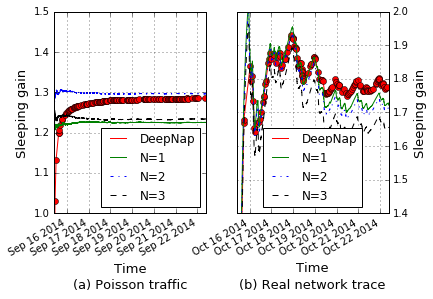

In [83]:
plt.figure(1)
#--------------------------
ax = plt.subplot(121)
# ts1.sample(frac=1).plot(legend=True, ax=ax, style=['k-'],)
ts9.sample(frac=0.0005).plot(legend=True, ax=ax, style=['r-o'], ylim=(1.0, 1.5))
ts6.sample(frac=1).plot(legend=True, ax=ax, style=['g-'],)
ts7.sample(frac=1).plot(legend=True, ax=ax, style=['b-.'],)
ts8.sample(frac=1).plot(legend=True, ax=ax, style=['k--'],)
# ts5.sample(frac=0.0005).plot(legend=True, ax=ax, style=['c-x'], ylim=(1,2))
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(13);
ax.title.set_text('(a) Poisson traffic'); ax.title.set_fontsize(13); ax.title.set_position((0.5, -0.4)) 
ax.xaxis.label.set_text('Time'); ax.xaxis.label.set_fontsize(13);
ax.grid()
#-------------------------
ax = plt.subplot(122)
ts1.sample(frac=0.0005).plot(legend=True, ax=ax, style=['r-o'],)
ts2.sample(frac=1).plot(legend=True, ax=ax, style=['g-'],)
ts3.sample(frac=1).plot(legend=True, ax=ax, style=['b-.'],)
ts4.sample(frac=1).plot(legend=True, ax=ax, style=['k--'], ylim=(1.4,2))
# ts5.sample(frac=0.0005).plot(legend=True, ax=ax, style=['c-x'], ylim=(1,2))
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(13);ax.yaxis.set_label_position('right');ax.yaxis.set_ticks_position('right');
ax.xaxis.label.set_fontsize(13); ax.xaxis.label.set_text('Time');
ax.title.set_text('(b) Real network trace'); ax.title.set_fontsize(13); ax.title.set_position((0.5, -0.4)) 
ax.grid()

plt.savefig("poisson.png", bbox_inches='tight', dpi=300)

In [57]:
df = extract_df("message_2016-6-17_Poisson1_N02.log")
print df.req_generated.sum()*1.0/df['epoch.1'].iloc[-1]
df = extract_df("message_2016-6-17_Poisson1_N03.log")
print df.req_generated.sum()*1.0/df['epoch.1'].iloc[-1]
df = extract_df("message_2016-6-16_G5_BUF2_AR1_b5_1015_1.log")
print df.req_generated.sum()*1.0/df['epoch.1'].iloc[-1]

message_2016-6-17_Poisson1_N02.log
1.00013227557
message_2016-6-17_Poisson1_N03.log
0.99860449274
message_2016-6-16_G5_BUF2_AR1_b5_1015_1.log
1.02849215771


In [46]:
print ts8.sum()
print ts9.sum()

373134.921773
527922.536042


# Fig8

In [2]:
def extract_df(f):
    df = pd.read_csv(f, delimiter=';', index_col=0)
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = 0.7*df['tr_reward'] - 0.3*df['op_cost']
    df['a_wake'] = (df.agent_action=='(False, \'serve_all\')')
    df['a_sleep'] = (df.agent_action=='(True, None)')
    print f
    return df
def extract_baseline_ts(df, name):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
    ts_on = (0.7*df['req_generated']-0.3*5).cumsum()/step
    ts = (ts-ts_on)
    ts.name = name
    return ts
delta = pd.to_timedelta('2 Seconds')

In [172]:
# f = './log/index_message_2016-6-8_XXX.log.csv'
f = './log/index_message_2016-6-12_G5_BUF1_AR1.log.csv'
df = pd.read_csv(f, delimiter=';', index_col=0)
df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
df.set_index('start_ts', inplace=True)
df['total_reward'] = df['tr_reward'] - df['op_cost']
df['a_wake'] = (df.agent_action=='(False, \'serve_all\')')
df['a_sleep'] = (df.agent_action=='(True, None)')

In [173]:
# f1 = './log/index_message_2016-6-7_2335_TQ_G9R40.log.csv'
f1 = './log/index_message_2016-6-12_G5_BUF1_FR20.log.csv'
df1 = pd.read_csv(f1, delimiter=';', index_col=0)
df1.loc[:, 'start_ts'] = df1['start_ts'].apply(lambda x: pd.to_datetime(x))
df1.set_index('start_ts', inplace=True)
df1['total_reward'] = df1['tr_reward'] - df1['op_cost']

In [174]:
# f2 = './log/index_message_2016-6-7_2335_TQ_AR20.log.csv'
f2 = './log/index_message_2016-6-12_G5_BUF2_AR1_b5.log.csv'
df2 = pd.read_csv(f2, delimiter=';', index_col=0)
df2.loc[:, 'start_ts'] = df2['start_ts'].apply(lambda x: pd.to_datetime(x))
df2.set_index('start_ts', inplace=True)
df2['total_reward'] = df2['tr_reward'] - df2['op_cost']

./log/index_message_2016-6-13_G5_BUF1_FR20_1.log.csv
./log/index_message_2016-6-13_G5_BUF2_FR20_1_1.log.csv
./log/index_message_2016-6-13_G5_BUF1_FR20_1_1.log.csv


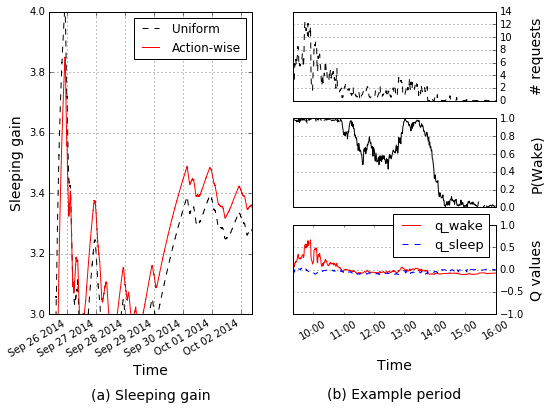

In [41]:
# non-weighted combining
plt.figure(1)
#--------------------
ax = plt.subplot(121)
# f = './log/index_message_2016-6-13_G5_BUF1_FR20_1_1.log.csv'
# df = extract_df(f)
# ts = extract_baseline_ts(df, 'Uniform')
# ts.plot(figsize=(9, 6), legend=True, ax=ax, 
#         style=['k--'], 
#         ylim=(3,4)
#        )
f = './log/index_message_2016-6-13_G5_BUF1_FR20_1.log.csv'
df = extract_df(f)
ts = extract_baseline_ts(df, 'Uniform')
ts.plot(figsize=(9, 6), legend=True, ax=ax, 
        style=['k--'], 
        ylim=(3,4)
       )
# f = './log/index_message_2016-6-13_G5_BUF2_FR20_1_2.log.csv'
# df = extract_df(f)
# ts = extract_baseline_ts(df, 'Action-wise')
# ts.plot(figsize=(9, 6), legend=True, ax=ax, 
#         style=['r-.'], 
#         ylim=(3,4)
#        )
f = './log/index_message_2016-6-13_G5_BUF2_FR20_1_1.log.csv'
df = extract_df(f)
ts = extract_baseline_ts(df, 'Action-wise')
ts.plot(figsize=(9, 6), legend=True, ax=ax, 
        style=['r-'], 
        ylim=(3,4)
       )
# f = './log/index_message_2016-6-13_G5_BUF2_FR20_1.log.csv'
# df = extract_df(f)
# ts = extract_baseline_ts(df, 'Action-wise')
# ts.plot(figsize=(9, 6), legend=True, ax=ax, 
#         style=['r-'], 
#         ylim=(3.2,3.6)
#        )
ax.title.set_text('(a) Sleeping gain'); ax.title.set_fontsize(14);  ax.title.set_position((0.5, -0.3))
ax.xaxis.label.set_fontsize(14); ax.xaxis.label.set_text('Time')
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(14)
ax.grid()

#---------------------
start = pd.to_datetime("2014-9-27 09:20:00")
end = pd.to_datetime("2014-9-27 16:00:00")
ax = plt.subplot(322)
f = './log/index_message_2016-6-13_G5_BUF1_FR20_1_1.log.csv'
# f = './log/index_message_2016-6-12_G5_BUF1_FR20.log.csv'
# f = './log/index_message_2016-6-13_G5_BUF1_FR20_1.log.csv'
df = extract_df(f)
ts = df.req_generated[start:end].resample('1Min')
ts.plot(figsize=(9, 6), legend=False, ax=ax, 
        style=['k--']
       )
ax.get_xaxis().set_visible(False)
ax.yaxis.label.set_text('# requests'); ax.yaxis.label.set_fontsize(14); ax.yaxis.set_label_coords(1.17, 0.5)
ax.yaxis.set_label_position('right'); ax.yaxis.set_ticks_position('right')
ax.grid()
# #------------------------------
ax = plt.subplot(324)
ts = df.batch_dist_wake[start:end].resample('1Min')
ts.plot(figsize=(9, 6), legend=False, ax=ax, 
        style=['k-'], ylim=(0,1)
       )
ax.get_xaxis().set_visible(False)
ax.yaxis.label.set_text('P(Wake)'); ax.yaxis.label.set_fontsize(14); ax.yaxis.set_label_coords(1.17, 0.5)
ax.yaxis.set_label_position('right');ax.yaxis.set_ticks_position('right')
ax.grid()
#------------------------------
ax = plt.subplot(326)
ts = df[['q_wake', 'q_sleep']][start:end].resample('1Min')
ts.plot(figsize=(8, 6), legend=True, ax=ax, 
        style=['r-', 'b--'], ylim=(-1,1), rot=30
       )
plt.legend(bbox_to_anchor=(1,1.2), fontsize=13)
ax.xaxis.label.set_fontsize(14); ax.xaxis.label.set_text('Time'); ax.xaxis.set_label_coords(0.5, -0.5)
ax.yaxis.label.set_text('Q values'); ax.yaxis.label.set_fontsize(14);ax.yaxis.set_label_position('right'); ax.yaxis.set_ticks_position('right')
ax.title.set_text('(b) Example period'); ax.title.set_fontsize(14); ax.title.set_position((0.5, -1))
ax.grid()

plt.savefig("actionwise.png", bbox_inches='tight', dpi=300)

./log/index_message_2016-6-13_G5_BUF1_FR20_1_2.log.csv
./log/index_message_2016-6-13_G5_BUF2_FR20_1.log.csv
./log/index_message_2016-6-13_G5_BUF1_FR20_1_1.log.csv


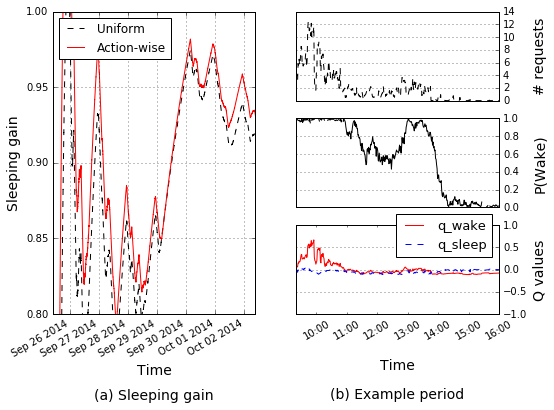

In [3]:
plt.figure(1)
#--------------------
ax = plt.subplot(121)
f = './log/index_message_2016-6-13_G5_BUF1_FR20_1_2.log.csv'
df = extract_df(f)
ts = extract_baseline_ts(df, 'Uniform')
ts.plot(figsize=(9, 6), legend=True, ax=ax, 
        style=['k--'],  )
# ax = plt.subplot(121)
# f = './log/index_message_2016-6-13_G5_BUF1_FR20_1_1.log.csv'
# df = extract_df(f)
# ts = extract_baseline_ts(df, 'Uniform')
# ts.plot(figsize=(9, 6), legend=True, ax=ax, 
#         style=['k--'], )
# f = './log/index_message_2016-6-13_G5_BUF1_FR20_1.log.csv'
# df = extract_df(f)
# ts = extract_baseline_ts(df, 'Uniform')
# ts.plot(figsize=(9, 6), legend=True, ax=ax, 
#         style=['k--'], )
# f = './log/index_message_2016-6-13_G5_BUF2_FR20_1_2.log.csv'
# df = extract_df(f)
# ts = extract_baseline_ts(df, 'Action-wise')
# ts.plot(figsize=(9, 6), legend=True, ax=ax, 
#         style=['r-.'], )
# f = './log/index_message_2016-6-13_G5_BUF2_FR20_1_1.log.csv'
# df = extract_df(f)
# ts = extract_baseline_ts(df, 'Action-wise')
# ts.plot(figsize=(9, 6), legend=True, ax=ax, 
#         style=['r-'], )
f = './log/index_message_2016-6-13_G5_BUF2_FR20_1.log.csv'
df = extract_df(f)
ts = extract_baseline_ts(df, 'Action-wise')
ts.plot(figsize=(9, 6), legend=True, ax=ax, 
        style=['r-'], ylim=(0.8,1))
ax.title.set_text('(a) Sleeping gain'); ax.title.set_fontsize(14);  ax.title.set_position((0.5, -0.3))
ax.xaxis.label.set_fontsize(14); ax.xaxis.label.set_text('Time')
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(14)
ax.grid()
#---------------------
start = pd.to_datetime("2014-9-27 09:20:00")
end = pd.to_datetime("2014-9-27 16:00:00")
ax = plt.subplot(322)
f = './log/index_message_2016-6-13_G5_BUF1_FR20_1_1.log.csv'
# f = './log/index_message_2016-6-12_G5_BUF1_FR20.log.csv'
# f = './log/index_message_2016-6-13_G5_BUF1_FR20_1.log.csv'
df = extract_df(f)
ts = df.req_generated[start:end].resample('1Min')
ts.plot(figsize=(9, 6), legend=False, ax=ax, 
        style=['k--']
       )
ax.get_xaxis().set_visible(False)
ax.yaxis.label.set_text('# requests'); ax.yaxis.label.set_fontsize(14); ax.yaxis.set_label_coords(1.17, 0.5)
ax.yaxis.set_label_position('right'); ax.yaxis.set_ticks_position('right')
ax.grid()
# #------------------------------
ax = plt.subplot(324)
ts = df.batch_dist_wake[start:end].resample('1Min')
ts.plot(figsize=(9, 6), legend=False, ax=ax, 
        style=['k-'], ylim=(0,1)
       )
ax.get_xaxis().set_visible(False)
ax.yaxis.label.set_text('P(Wake)'); ax.yaxis.label.set_fontsize(14); ax.yaxis.set_label_coords(1.17, 0.5)
ax.yaxis.set_label_position('right');ax.yaxis.set_ticks_position('right')
ax.grid()
#------------------------------
ax = plt.subplot(326)
ts = df[['q_wake', 'q_sleep']][start:end].resample('1Min')
ts.plot(figsize=(8, 6), legend=True, ax=ax, 
        style=['r-', 'b--'], ylim=(-1,1), rot=30
       )
plt.legend(bbox_to_anchor=(1,1.2), fontsize=13)
ax.xaxis.label.set_fontsize(14); ax.xaxis.label.set_text('Time'); ax.xaxis.set_label_coords(0.5, -0.5)
ax.yaxis.label.set_text('Q values'); ax.yaxis.label.set_fontsize(14);ax.yaxis.set_label_position('right'); ax.yaxis.set_ticks_position('right')
ax.title.set_text('(b) Example period'); ax.title.set_fontsize(14); ax.title.set_position((0.5, -1))
ax.grid()

plt.savefig("actionwise.png", bbox_inches='tight', dpi=300)

# Fig9

In [75]:
def extract_df(f):
    df = pd.read_csv(f, delimiter=';', index_col=0)
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = 0.5*df['tr_reward'] - 0.5*df['op_cost']
    print f
    return df
def extract_baseline_ts(df, name):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
    ts_on = (0.5*df['req_generated']-0.5*5).cumsum()/step
    ts = (ts-ts_on)
    ts.name = name
    return ts

delta = pd.to_timedelta('2 Seconds')

./log/index_message_2016-6-12_G5_BUF2_AR1.log.csv
./log/index_message_2016-6-12_G5_BUF2_AR1.log.csv
./log/index_message_2016-6-11_BUF2_G5_FR1.log.csv
./log/index_message_2016-6-11_BUF2_G5.log.csv
./log/index_message_2016-6-11_BUF2_G5_FR100.log.csv
./log/index_message_2016-6-12_G9_BUF2_AR1.log.csv
./log/index_message_2016-6-12_G9_BUF2_FR1.log.csv
./log/index_message_2016-6-12_G9_BUF2_FR20.log.csv
./log/index_message_2016-6-12_G9_BUF2_FR100.log.csv


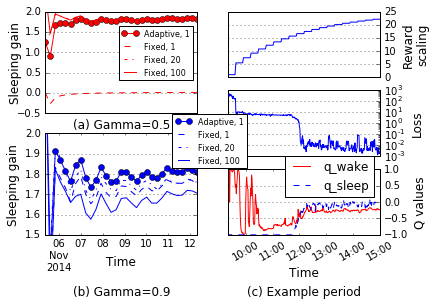

In [77]:
plt.figure(1)
#----------
#--------------------
start = pd.to_datetime("2014-11-05 09:20:36")
end = pd.to_datetime("2014-11-05 15:00:00")
ax = plt.subplot(322)
df = extract_df('./log/index_message_2016-6-12_G5_BUF2_AR1.log.csv')
df[start:end].reward_scaling.resample('1Min').plot(ax=ax)
ax.get_xaxis().set_visible(False)
ax.grid()
ax.yaxis.label.set_text('Reward\nscaling');ax.yaxis.label.set_fontsize(12); ax.yaxis.set_label_position('right');ax.yaxis.set_ticks_position('right')
ax = plt.subplot(324)
df[start:end].loss.resample('1Min').plot(ax=ax, logy=True)
ax.get_xaxis().set_visible(False)
ax.grid()
ax.yaxis.label.set_text('Loss');ax.yaxis.label.set_fontsize(12);ax.yaxis.set_label_position('right');ax.yaxis.set_ticks_position('right')
ax = plt.subplot(326)
df[start:end][['q_wake','q_sleep']].resample('1Min').plot(ax=ax, 
#                                                           ylim=(-1.1, 1.1), 
                                                          style=['r-', 'b--'], rot=30)
ax.xaxis.label.set_fontsize(12);ax.xaxis.label.set_text('Time')
ax.grid()
ax.yaxis.label.set_text('Q values');ax.yaxis.label.set_fontsize(12); ax.yaxis.set_label_position('right');ax.yaxis.set_ticks_position('right')
plt.legend(bbox_to_anchor=(1,1.3), fontsize=12)
ax.title.set_text('(c) Example period'); ax.title.set_fontsize(12); ax.title.set_position((0.5, -1))
#--------------------
ax = plt.subplot(221)
df = extract_df('./log/index_message_2016-6-12_G5_BUF2_AR1.log.csv')
ts = extract_baseline_ts(df, 'Adaptive, 1')
ts.iloc[1:-1:10000].plot(legend=True, ax=ax, style=['r-o'])
df = extract_df('./log/index_message_2016-6-11_BUF2_G5_FR1.log.csv')
ts = extract_baseline_ts(df, 'Fixed, 1')
ts.iloc[1:-1:10000].plot(legend=True, ax=ax,style=['r--'])
df = extract_df('./log/index_message_2016-6-11_BUF2_G5.log.csv')
ts = extract_baseline_ts(df, 'Fixed, 20')
ts.iloc[1:-1:10000].plot(legend=True, ax=ax,style=['r-.'])
df = extract_df('./log/index_message_2016-6-11_BUF2_G5_FR100.log.csv')
ts = extract_baseline_ts(df, 'Fixed, 100')
ts.iloc[1:-1:10000].plot(legend=True, ax=ax, style=['r-'], 
                         ylim=(-0.5, 2)
                        )
ax.grid()
ax.get_xaxis().set_visible(False)
ax.title.set_text('(a) Gamma=0.5'); ax.title.set_fontsize(12); ax.title.set_position((0.5,-0.2))
plt.legend(bbox_to_anchor=(1,0.9), fontsize=8)
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(12); ax.yaxis.set_label_coords(-0.15,0.5)
#--------------------
ax = plt.subplot(223)
df = extract_df('./log/index_message_2016-6-12_G9_BUF2_AR1.log.csv')
ts = extract_baseline_ts(df, 'Adaptive, 1')
ts.iloc[1:-1:10000].plot(legend=True, ax=ax, style=['b-o'])
df = extract_df('./log/index_message_2016-6-12_G9_BUF2_FR1.log.csv')
ts = extract_baseline_ts(df, 'Fixed, 1')
ts.iloc[1:-1:10000].plot(legend=True, ax=ax,style=['b--'])
df = extract_df('./log/index_message_2016-6-12_G9_BUF2_FR20.log.csv')
ts = extract_baseline_ts(df, 'Fixed, 20')
ts.iloc[1:-1:10000].plot(legend=True, ax=ax,style=['b-.'])
df = extract_df('./log/index_message_2016-6-12_G9_BUF2_FR100.log.csv')
ts = extract_baseline_ts(df, 'Fixed, 100')
ts.iloc[1:-1:10000].plot(legend=True, ax=ax, style=['b-'], ylim=(1.5, 2))
ax.grid()
ax.xaxis.label.set_text('Time'); ax.xaxis.label.set_fontsize(12); ax.xaxis.set_label_coords(0.5, -0.2)
ax.title.set_text('(b) Gamma=0.9'); ax.title.set_fontsize(12); ax.title.set_position((0.5,-0.65))
plt.legend(bbox_to_anchor=(1.35,1.23), fontsize=8)
ax.yaxis.label.set_text('Sleeping gain'); ax.yaxis.label.set_fontsize(12)
#----------------------

plt.savefig("adaptive.png", bbox_inches='tight', dpi=300)

# Fig10

In [2]:
f_list = [
# "message_2016-6-12_G5_BUF2_AR1_b10.log",
"message_2016-6-12_G5_BUF2_AR1_b1.log",
"message_2016-6-12_G5_BUF2_AR1_b15.log",
"message_2016-6-12_G5_BUF2_AR1_b2.log",
"message_2016-6-12_G5_BUF2_AR1_b25.log",
"message_2016-6-12_G5_BUF2_AR1_b3.log",
"message_2016-6-12_G5_BUF2_AR1_b35.log",
"message_2016-6-12_G5_BUF2_AR1_b4.log",
# "message_2016-6-12_G5_BUF2_AR1_b45.log",
"message_2016-6-12_G5_BUF2_AR1_b5.log",
"message_2016-6-12_G5_BUF2_AR1_b55.log",
"message_2016-6-12_G5_BUF2_AR1_b6.log",
"message_2016-6-12_G5_BUF2_AR1_b65.log",
"message_2016-6-12_G5_BUF2_AR1_b7.log",
# "message_2016-6-12_G5_BUF2_AR1_b75.log",
"message_2016-6-12_G5_BUF2_AR1_b8.log",
# "message_2016-6-12_G5_BUF2_AR1_b85.log",
# "message_2016-6-12_G5_BUF2_AR1_b9.log",
]

In [3]:
def get_reward(df):
    tr_wait = -1.0*sum(df.tr_reward_wait)/sum(df.req_generated)
    op_cost = mean(df.op_cost)
    return tr_wait, op_cost
def get_df(f):
    f = './log/index_'+f+'.csv'
    df = pd.read_csv(f, delimiter=';', index_col=0)
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    return df

In [4]:
tups = [None]*len(f_list)
for i, f in enumerate(f_list):
    print f
    tups[i] = get_reward(get_df(f))

message_2016-6-12_G5_BUF2_AR1_b1.log
message_2016-6-12_G5_BUF2_AR1_b15.log
message_2016-6-12_G5_BUF2_AR1_b2.log
message_2016-6-12_G5_BUF2_AR1_b25.log
message_2016-6-12_G5_BUF2_AR1_b3.log
message_2016-6-12_G5_BUF2_AR1_b35.log
message_2016-6-12_G5_BUF2_AR1_b4.log
message_2016-6-12_G5_BUF2_AR1_b5.log
message_2016-6-12_G5_BUF2_AR1_b55.log
message_2016-6-12_G5_BUF2_AR1_b6.log
message_2016-6-12_G5_BUF2_AR1_b65.log
message_2016-6-12_G5_BUF2_AR1_b7.log
message_2016-6-12_G5_BUF2_AR1_b8.log


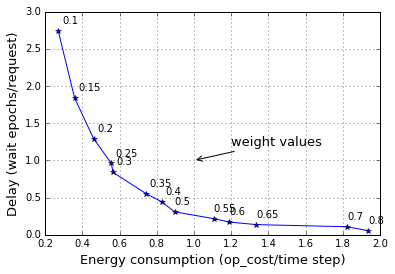

In [5]:
plt.figure(1)
#--------------------
ax = plt.subplot(111)
beta = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 
        0.5, 0.55, 0.6, 0.65, 0.7, 0.8,]
y=[tup[0] for i, tup in enumerate(tups)]
x=[tup[1] for i, tup in enumerate(tups)]
plt.plot(x[:],y[:], 'b-*')
for i in range(len(x)/2+1):
    ax.annotate(str(beta[i]), xy=(x[i]+0.02, y[i]+0.1))
for i in range(len(x)/2+1, len(x)):
    ax.annotate(str(beta[i]), xy=(x[i]+0, y[i]+0.1))
ax.annotate('weight values', xy=(1, 1), xytext=(1.2,1.2), size=13, arrowprops=dict(arrowstyle="->"))
ax.yaxis.label.set_fontsize(13)
ax.yaxis.label.set_text('Delay (wait epochs/request)')
ax.xaxis.label.set_fontsize(13)
ax.xaxis.label.set_text('Energy consumption (op_cost/time step)')
ax.grid()
plt.savefig("tradeoff.png", bbox_inches='tight', dpi=300)